[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/Linth84/challenge-telecom-x-churn/blob/main/EdVillalba_Telecom_X_Analisis_Churn.ipynb
)

# Telecom X — Análisis de Evasión de Clientes (Churn)

**Objetivo:** Analizar el fenómeno de evasión de clientes (*churn*) a partir de datos demográficos, de servicios y de facturación, identificando patrones que puedan apoyar estrategias de retención.

**Fuente de datos:** archivo JSON provisto por el repositorio oficial del challenge (acceso directo vía enlace RAW/API).


## Índice

1. Extracción de datos (API)  
2. Exploración inicial y comprensión del dataset  
3. Limpieza, tratamiento y verificación de incoherencias  
4. Ingeniería de variables: `Cuentas_Diarias`  
5. Estandarización y transformación (Extra - opcional)  
6. Análisis exploratorio de datos (EDA)  
7. Correlación entre variables (Extra - opcional)  
8. Cierre del proyecto: conclusiones, insights y recomendaciones  


## 1. Extracción de datos (API)

Se cargan los datos directamente desde la API (JSON) y se convierten a un DataFrame de Pandas.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Enlace RAW del dataset (API)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

df = pd.read_json(url)
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## 2. Exploración inicial y comprensión del dataset

En esta etapa se revisa la estructura del dataset, tipos de datos y se normaliza el JSON anidado para trabajar con columnas planas.

In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


### 2.1 Normalización del JSON

El JSON contiene campos anidados. Para facilitar la manipulación, se normaliza la estructura a un DataFrame tabular.

In [35]:
df_normalized = pd.json_normalize(df.to_dict(orient="records"))
df_normalized.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [36]:
df_normalized.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

Durante la exploración inicial se identificaron variables **demográficas**, **contractuales** y **financieras**. A partir del diccionario de datos provisto, se seleccionaron aquellas variables más relevantes para el análisis de evasión de clientes, priorizando información sobre **contratos**, **antigüedad** y **cargos**.

## 3. Limpieza, tratamiento y verificación de incoherencias

Se revisan valores ausentes, duplicados, formatos y consistencia de categorías para asegurar que los datos estén listos para el análisis.

In [37]:
# Verificación básica de duplicados por customerID
dup_customer = df_normalized['customerID'].duplicated().sum()
dup_customer


np.int64(0)

In [38]:
# Limpieza de la variable objetivo: normalizo y filtro valores válidos (Yes/No)
df_normalized['Churn'] = df_normalized['Churn'].astype(str).str.strip()

df_normalized = df_normalized[df_normalized['Churn'].isin(['Yes', 'No'])].copy()

df_normalized['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


In [39]:
# TotalCharges llega como texto; se convierte a numérico para análisis cuantitativo
df_normalized['account.Charges.Total'] = pd.to_numeric(df_normalized['account.Charges.Total'], errors='coerce')

# Para tenure == 0, asumimos total gastado = 0 (sin historial de cobro acumulado)
mask_tenure0 = df_normalized['customer.tenure'] == 0
df_normalized.loc[mask_tenure0, 'account.Charges.Total'] = 0

# Revisión de nulos remanentes
df_normalized['account.Charges.Total'].isna().sum()


np.int64(0)

In [40]:
# Chequeo final: tipos consistentes y sin nulos en variables clave
df_normalized.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

Durante la preparación de los datos se verificó la ausencia de valores nulos relevantes, la inexistencia de registros duplicados por `customerID` y la consistencia de las categorías. Asimismo, se corrigieron errores de formato en variables numéricas y se validaron los valores de la variable objetivo (churn), asegurando que los datos estén listos para el análisis exploratorio.

## 4. Feature engineering: creación de `Cuentas_Diarias`

Se crea la columna **Cuentas_Diarias** a partir de la facturación mensual (valor promedio diario).

In [41]:
df_normalized['Cuentas_Diarias'] = df_normalized['account.Charges.Monthly'] / 30

df_normalized[['account.Charges.Monthly', 'Cuentas_Diarias']].head()


,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


Se creó la columna **Cuentas_Diarias** a partir de la facturación mensual, calculando un valor promedio diario. Esta variable permite analizar con mayor detalle el impacto de los cargos en el comportamiento de evasión de los clientes.

## 5. Estandarización y transformación de datos (Extra - opcional)

De forma opcional, se realizan transformaciones adicionales para facilitar el análisis matemático y preparar el dataset para modelos predictivos.

In [42]:
# Conversión opcional de variables binarias a formato 0/1
df_normalized['Churn_bin'] = df_normalized['Churn'].map({'No': 0, 'Yes': 1})
df_normalized['PaperlessBilling_bin'] = df_normalized['account.PaperlessBilling'].map({'No': 0, 'Yes': 1})

df_normalized[['Churn','Churn_bin','account.PaperlessBilling','PaperlessBilling_bin']].head()


,Churn,Churn_bin,account.PaperlessBilling,PaperlessBilling_bin
0,No,0,Yes,1
1,No,0,No,0
2,Yes,1,Yes,1
3,Yes,1,Yes,1
4,Yes,1,Yes,1


Estas transformaciones permiten representar variables categóricas en un formato numérico, facilitando cálculos estadísticos y el desarrollo futuro de modelos predictivos. Al tratarse de un paso opcional, se implementó de forma controlada sin alterar los análisis exploratorios.

## 6. Análisis Exploratorio de Datos (EDA)

A continuación se presentan análisis descriptivos y visualizaciones para identificar patrones asociados a la evasión.

### 6.0 Análisis descriptivo de variables numéricas

Se calculan métricas descriptivas (media, mediana, desviación estándar, mínimos y máximos) para comprender la distribución de variables numéricas principales.

In [43]:
df_normalized[['customer.tenure','account.Charges.Monthly','account.Charges.Total','Cuentas_Diarias']].describe()


,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,2.158723
std,24.559481,30.090047,2266.794470,1.003002
min,0.000000,18.250000,0.000000,0.608333
25%,9.000000,35.500000,398.550000,1.183333
50%,29.000000,70.350000,1394.550000,2.345000
75%,55.000000,89.850000,3786.600000,2.995000
max,72.000000,118.750000,8684.800000,3.958333


### 6.1 Distribución de evasión (Churn)

Se visualiza la proporción de clientes que permanecen vs. los que abandonan.

In [44]:
churn_pct = df_normalized['Churn'].value_counts(normalize=True) * 100
churn_pct


,proportion
Churn,
No,73.463013
Yes,26.536987


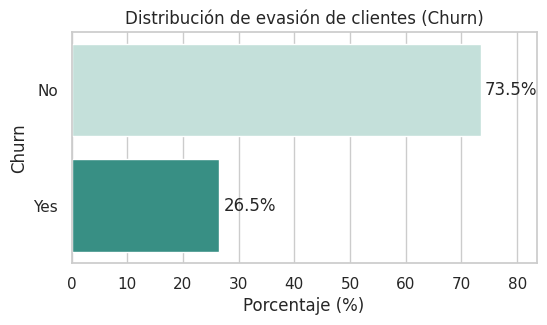

In [87]:
sns.set_style("whitegrid")

plt.figure(figsize=(6,3))
ax = sns.barplot(
    data=churn_pct,
    y='Churn',
    x='Porcentaje',
    orient='h',
    hue='Churn',
    palette={
        'No': '#BFE5DC',
        'Yes': '#2A9D8F'
    },
    legend=False
)

plt.title('Distribución de evasión de clientes (Churn)')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Churn')

# Etiquetas
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.xlim(0, churn_pct['Porcentaje'].max() + 10)
plt.show()


### 6.2 Recuento de evasión por variables categóricas

Se analiza churn según variables categóricas para identificar perfiles con mayor tendencia a abandono.

#### 6.2.1 Churn según tipo de contrato

In [46]:
churn_by_contract = (
    df_normalized
    .groupby('account.Contract')['Churn']
    .value_counts(normalize=True)
    .mul(100)
    .rename('percentage')
    .reset_index()
)
churn_by_contract


,account.Contract,Churn,percentage
0,Month-to-month,No,57.290323
1,Month-to-month,Yes,42.709677
2,One year,No,88.730482
3,One year,Yes,11.269518
4,Two year,No,97.168142
5,Two year,Yes,2.831858


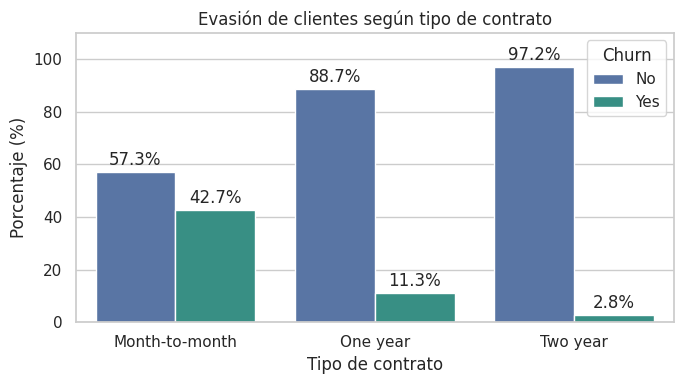

In [70]:
plt.figure(figsize=(7,4))

ax = sns.barplot(
    data=churn_by_contract,
    x='account.Contract',
    y='percentage',
    hue='Churn',
    order=order_contract,
    palette={
        'No': '#4C72B0',
        'Yes': '#2A9D8F'
    }
)

plt.title('Evasión de clientes según tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Porcentaje (%)')

# etiquetas
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=2)

plt.ylim(0, 110)
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()



Se observa una relación clara entre el tipo de contrato y la evasión de clientes. Los clientes con contratos mensuales presentan la mayor tasa de churn, mientras que aquellos con contratos de uno y dos años muestran una probabilidad significativamente menor de abandono. Esto sugiere que los contratos de mayor duración contribuyen de forma efectiva a la retención de clientes.

#### 6.2.2 Churn según género

In [48]:
churn_by_gender = (
    df_normalized
    .groupby('customer.gender')['Churn']
    .value_counts(normalize=True)
    .mul(100)
    .rename('percentage')
    .reset_index()
)
churn_by_gender


,customer.gender,Churn,percentage
0,Female,No,73.079128
1,Female,Yes,26.920872
2,Male,No,73.839662
3,Male,Yes,26.160338


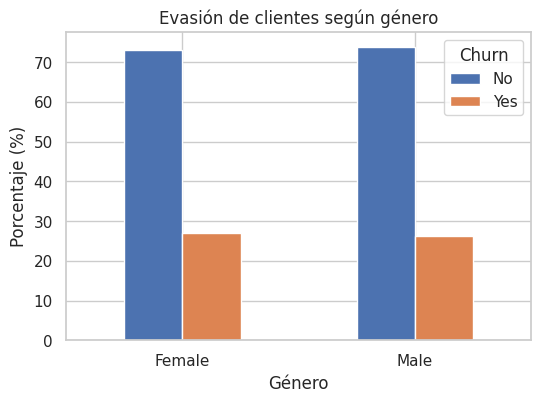

In [75]:
pivot_gender = churn_by_gender.pivot(index='customer.gender', columns='Churn', values='percentage')
pivot_gender.plot(kind='bar', figsize=(6,4), rot=0)
plt.title('Evasión de clientes según género')
plt.xlabel('Género')
plt.ylabel('Porcentaje (%)')
plt.show()


#### 6.2.3 Churn según método de pago

In [50]:
churn_by_payment = (
    df_normalized
    .groupby('account.PaymentMethod')['Churn']
    .value_counts(normalize=True)
    .mul(100)
    .rename('percentage')
    .reset_index()
)
churn_by_payment


,account.PaymentMethod,Churn,percentage
0,Bank transfer (automatic),No,83.290155
1,Bank transfer (automatic),Yes,16.709845
2,Credit card (automatic),No,84.756899
3,Credit card (automatic),Yes,15.243101
4,Electronic check,No,54.714588
5,Electronic check,Yes,45.285412
6,Mailed check,No,80.893300
7,Mailed check,Yes,19.106700


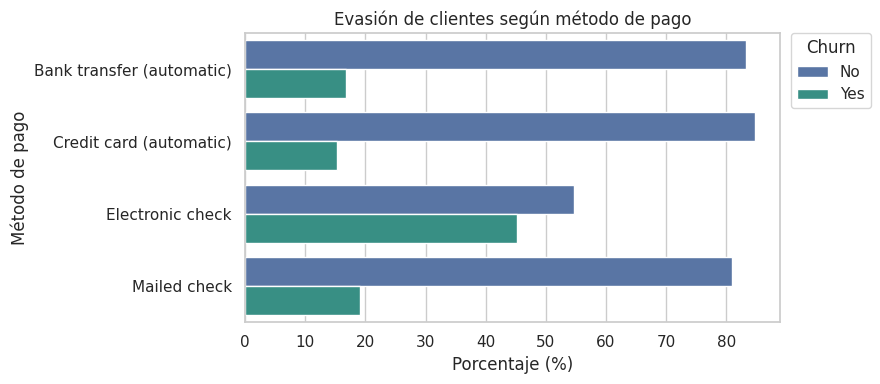

In [80]:
plt.figure(figsize=(9,4))

ax = sns.barplot(
    data=churn_by_payment,
    y='account.PaymentMethod',
    x='percentage',
    hue='Churn',
    palette={'No': '#4C72B0', 'Yes': '#2A9D8F'}
)

plt.title('Evasión de clientes según método de pago')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Método de pago')

plt.legend(title='Churn', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()



El análisis por variables categóricas permite observar diferencias en la evasión según el perfil y comportamiento de pago. En general, el **tipo de contrato** y el **método de pago** tienden a mostrar mayores diferencias en churn.

### 6.3 Variables numéricas vs evasión

Se comparan distribuciones de variables numéricas entre clientes que cancelaron y los que no.

Para las variables numéricas (antigüedad, cargos mensuales y total gastado),
se utilizaron boxplots, ya que permiten comparar de forma clara la distribución,
mediana y presencia de valores atípicos entre clientes que evaden y los que no.


#### 6.3.1 Antigüedad (tenure) vs churn

In [52]:
df_normalized.groupby('Churn')['customer.tenure'].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


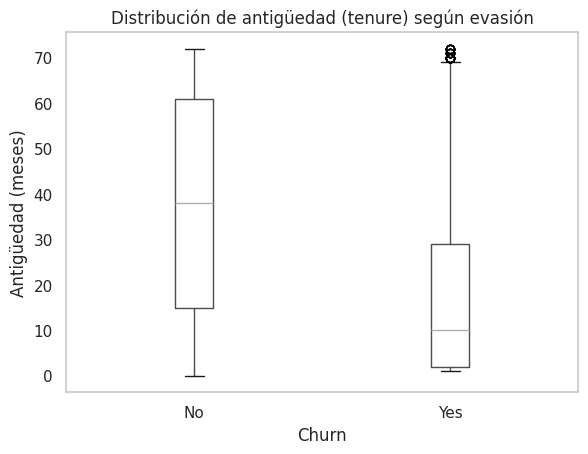

In [53]:
df_normalized.boxplot(column='customer.tenure', by='Churn', grid=False)
plt.title('Distribución de antigüedad (tenure) según evasión')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Antigüedad (meses)')
plt.show()


Los clientes que abandonan el servicio tienden a presentar menor antigüedad. Esto sugiere que el churn ocurre con mayor frecuencia en etapas tempranas de la relación con la empresa.

#### 6.3.2 Cargos mensuales vs churn

In [54]:
df_normalized.groupby('Churn')['account.Charges.Monthly'].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


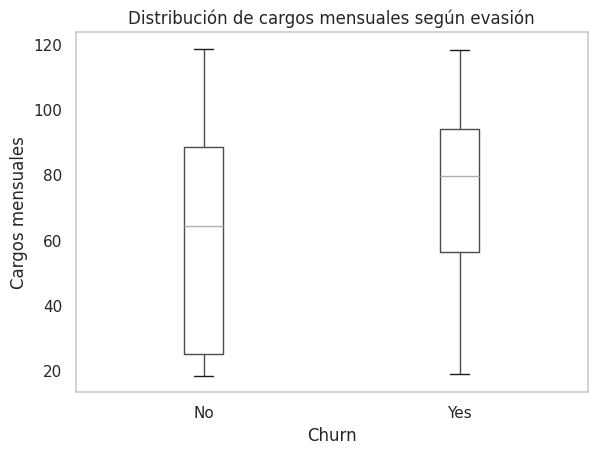

In [55]:
df_normalized.boxplot(column='account.Charges.Monthly', by='Churn', grid=False)
plt.title('Distribución de cargos mensuales según evasión')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Cargos mensuales')
plt.show()


Los clientes que abandonan el servicio presentan, en promedio, cargos mensuales más elevados. Esto sugiere que el costo del servicio puede influir en la decisión de abandono.

#### 6.3.3 Total gastado vs churn

In [56]:
df_normalized.groupby('Churn')['account.Charges.Total'].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,2549.911442,2329.954215,0.00,572.9,1679.525,4262.85,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.5,703.550,2331.30,8684.80


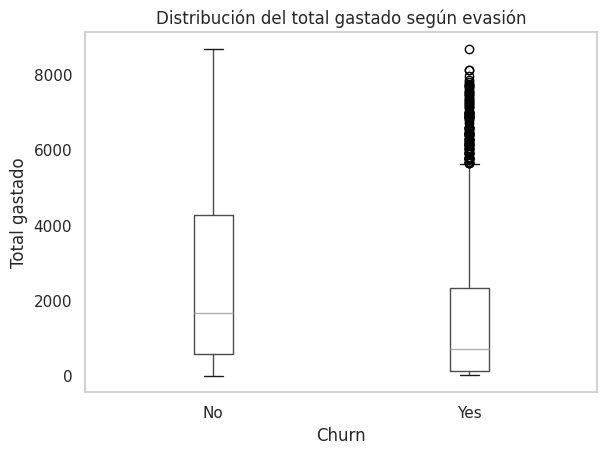

In [57]:
df_normalized.boxplot(column='account.Charges.Total', by='Churn', grid=False)
plt.title('Distribución del total gastado según evasión')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Total gastado')
plt.show()


El total gastado suele estar asociado a la antigüedad: clientes con menor tenure tienden a acumular menor gasto total y concentran mayor evasión.

## 7. Análisis de correlación entre variables (Extra - opcional)

Este análisis explora correlaciones entre variables numéricas y churn (binario). Las correlaciones no implican causalidad, pero pueden orientar modelos predictivos.

In [58]:
corr_vars = df_normalized[['Churn_bin','customer.tenure','account.Charges.Monthly','account.Charges.Total','Cuentas_Diarias']].copy()
corr_matrix = corr_vars.corr(numeric_only=True)
corr_matrix


,Churn_bin,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
Churn_bin,1.000000,-0.352229,0.193356,-0.198324,0.193356
customer.tenure,-0.352229,1.000000,0.247900,0.826178,0.247900
account.Charges.Monthly,0.193356,0.247900,1.000000,0.651174,1.000000
account.Charges.Total,-0.198324,0.826178,0.651174,1.000000,0.651174
Cuentas_Diarias,0.193356,0.247900,1.000000,0.651174,1.000000


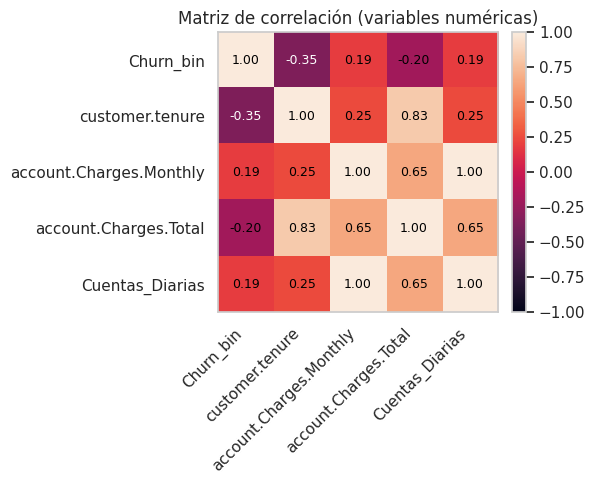

In [84]:
fig, ax = plt.subplots(figsize=(6,5))

ax.grid(False)

im = ax.imshow(corr_matrix.values, vmin=-1, vmax=1)

ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
ax.set_yticks(range(len(corr_matrix.index)))
ax.set_yticklabels(corr_matrix.index)

# Anotaciones con lógica clara y legible
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        value = corr_matrix.iloc[i, j]

        # Blanco solo para valores negativos fuertes (fondos oscuros)
        text_color = 'white' if value < -0.3 else 'black'

        ax.text(
            j, i,
            f"{value:.2f}",
            ha='center',
            va='center',
            fontsize=9,
            color=text_color
        )

plt.title('Matriz de correlación (variables numéricas)')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()



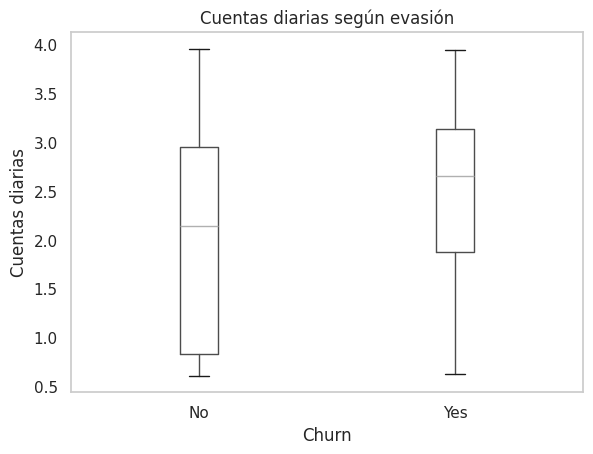

In [60]:
df_normalized.boxplot(
    column='Cuentas_Diarias',
    by='Churn',
    grid=False
)
plt.title('Cuentas diarias según evasión')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Cuentas diarias')
plt.show()



El análisis de correlación suele mostrar una relación **negativa** entre churn y antigüedad (tenure), indicando que a mayor permanencia, menor probabilidad de evasión. También se observa relación **positiva** entre churn y cargos (mensuales/diarios), lo que refuerza los hallazgos del EDA. Estas relaciones son exploratorias y pueden ser útiles en el desarrollo futuro de modelos predictivos.

## 8. Cierre del proyecto: conclusiones, insights y recomendaciones

### Conclusiones principales

A partir del análisis exploratorio se identificaron patrones claros asociados a la evasión de clientes en Telecom X, particularmente relacionados con el tipo de contrato, la antigüedad del cliente y el nivel de cargos.

El tipo de contrato se presenta como el factor más relevante: los clientes con contratos mensuales muestran una tasa de churn significativamente mayor que aquellos con contratos de uno o dos años, lo que sugiere una menor retención cuando no existe un compromiso a largo plazo.

La antigüedad del cliente (tenure) mantiene una relación inversa con la evasión. Los clientes que abandonan el servicio tienden a concentrarse en los primeros meses, mientras que aquellos con mayor permanencia presentan una probabilidad significativamente menor de churn.

Desde el punto de vista económico, los clientes que cancelan suelen registrar cargos mensuales y diarios más elevados, lo que indica que el costo del servicio puede influir en la decisión de abandono. Este patrón se observa tanto en los análisis gráficos como en el análisis de correlación.

### Insights clave

El churn no se distribuye de manera uniforme, sino que se concentra en perfiles específicos: clientes recientes, con contratos mensuales y mayores cargos.

La antigüedad actúa como un factor protector, ya que a mayor permanencia, menor es la probabilidad de evasión.

Las variables de facturación (mensual y diaria) aparecen de forma consistente asociadas al churn, por lo que representan candidatas relevantes para análisis predictivos.

### Recomendaciones

Fomentar la migración desde contratos mensuales hacia contratos de mayor duración mediante incentivos tempranos.

Implementar estrategias de retención focalizadas en clientes con baja antigüedad, especialmente durante los primeros meses de relación con la empresa.

Evaluar planes o beneficios específicos para clientes con cargos elevados, reduciendo la percepción de costo y aumentando el valor percibido del servicio.

Utilizar las variables analizadas (tipo de contrato, antigüedad y cargos) como base para el desarrollo futuro de un modelo predictivo de churn.